# Calculations with flat membranes

In [90]:
from sigmaepsilon.solid.material import MembraneSection as Section
from sigmaepsilon.math.linalg import ReferenceFrame
from sigmaepsilon.solid.material import (
    ElasticityTensor,
    LinearElasticMaterial,
    HuberMisesHenckyFailureCriterion_M,
)
from sigmaepsilon.solid.material.utils import elastic_stiffness_matrix

E = 2890.0
nu = 0.2
yield_strength = 2.0
thickness = 25.0

hooke = elastic_stiffness_matrix(E=E, NU=nu)
frame = ReferenceFrame(dim=3)
stiffness = ElasticityTensor(hooke, frame=frame, tensorial=False)

failure_model = HuberMisesHenckyFailureCriterion_M(yield_strength=yield_strength)

material = LinearElasticMaterial(stiffness=stiffness, failure_model=failure_model)

section = Section(
    layers=[
        Section.Layer(material=material, thickness=thickness / 3),
        Section.Layer(material=material, thickness=thickness / 3),
        Section.Layer(material=material, thickness=thickness / 3),
    ]
)
section.elastic_stiffness_matrix().shape

(3, 3)

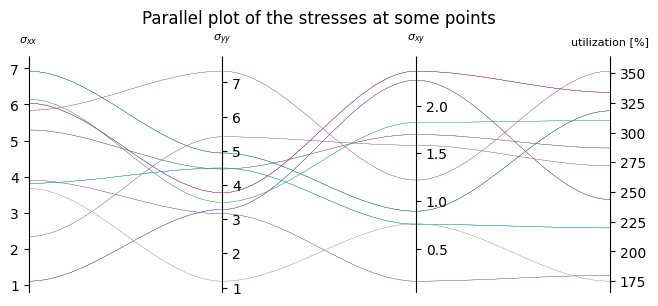

In [91]:
from sigmaepsilon.mesh.plotting import parallel_mpl
import numpy as np

strains = 2 * np.random.rand(10, 3) / 1000  # random data
z = np.array([-1.0, 0.0, 1.0])

stresses = section.calculate_stresses(strains=strains, z=z).values
util = section.utilization(strains=strains, z=z).values * 100

nXY, nZ, nStress = stresses.shape
stresses = stresses.reshape((nXY*nZ, nStress))
util = util.reshape((nXY*nZ))

colors = np.random.rand(stresses.shape[0], 3)
labels = [str(i) for i in range(stresses.shape[-1])]
values = [stresses[:, i] for i in range(stresses.shape[-1])]
values += [util]

labels = [r"$\sigma_{xx}$", r"$\sigma_{yy}$", r"$\sigma_{xy}$"]
labels += [r"utilization [%]"]

_ = parallel_mpl(
    values,
    labels=labels,
    padding=0.05,
    lw=0.2,
    colors=colors,
    title="Parallel plot of the stresses at some points",
)

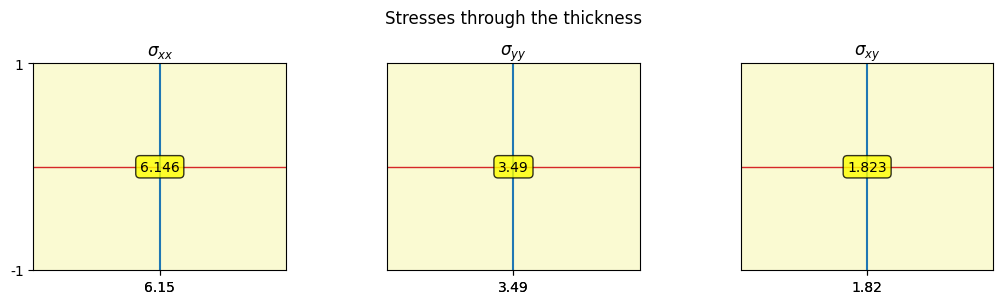

In [92]:
from sigmaepsilon.mesh.plotting.mpl.parallel import aligned_parallel_mpl
import numpy as np

n_data = 150
z = np.linspace(-1.0, 1.0, n_data)
stresses = section.calculate_stresses(strains=strains, z=z).values

labels = [r"$\sigma_{xx}$", r"$\sigma_{yy}$", r"$\sigma_{xy}$"]

fig = aligned_parallel_mpl(
    stresses[5, :, :],
    z,
    yticks=[-1, 1],
    y0=0.0,
    figsize=(12, 3),
    suptitle="Stresses through the thickness",
    labels=labels,
)

# Adjusts the top of the subplots to make room for the title
fig.subplots_adjust(top=0.80) 

In [93]:
strains = 2 * np.random.rand(5, 3) / 100000  # random data
z = np.array([-1.0, 0.0, 1.0])
stresses = section.calculate_stresses(strains=strains, z=z)
stresses

<xarray.DataArray (index: 5, point: 3, component: 3)>
array([[[0.06776828, 0.06934245, 0.00830987],
        [0.06776828, 0.06934245, 0.00830987],
        [0.06776828, 0.06934245, 0.00830987]],

       [[0.01942727, 0.03541379, 0.00757157],
        [0.01942727, 0.03541379, 0.00757157],
        [0.01942727, 0.03541379, 0.00757157]],

       [[0.03650543, 0.02729479, 0.0025419 ],
        [0.03650543, 0.02729479, 0.0025419 ],
        [0.03650543, 0.02729479, 0.0025419 ]],

       [[0.02537192, 0.01181445, 0.01004103],
        [0.02537192, 0.01181445, 0.01004103],
        [0.02537192, 0.01181445, 0.01004103]],

       [[0.02237664, 0.0467874 , 0.01483788],
        [0.02237664, 0.0467874 , 0.01483788],
        [0.02237664, 0.0467874 , 0.01483788]]])
Coordinates:
  * index      (index) int32 0 1 2 3 4
  * point      (point) int32 0 1 2
  * component  (component) <U3 'SXX' 'SYY' 'SXY'

In [94]:
stresses.sel(index = 3).to_pandas()

component,SXX,SYY,SXY
point,,,
0,0.025372,0.011814,0.010041
1,0.025372,0.011814,0.010041
2,0.025372,0.011814,0.010041


In [95]:
stresses.sel(component = "SXX").to_pandas()

point,0,1,2
index,,,
0,0.067768,0.067768,0.067768
1,0.019427,0.019427,0.019427
2,0.036505,0.036505,0.036505
3,0.025372,0.025372,0.025372
4,0.022377,0.022377,0.022377


In [96]:
stresses.sel(component = "SXX", point=0)

<xarray.DataArray (index: 5)>
array([0.06776828, 0.01942727, 0.03650543, 0.02537192, 0.02237664])
Coordinates:
  * index      (index) int32 0 1 2 3 4
    point      int32 0
    component  <U3 'SXX'

In [97]:
strains = 2 * np.random.rand(2, 3) / 100000  # random data
section.calculate_stresses(strains=strains)

<xarray.DataArray (index: 2, layer: 3, point: 3, component: 3)>
array([[[[0.05295662, 0.05801467, 0.01841073],
         [0.05295662, 0.05801467, 0.01841073],
         [0.05295662, 0.05801467, 0.01841073]],

        [[0.05295662, 0.05801467, 0.01841073],
         [0.05295662, 0.05801467, 0.01841073],
         [0.05295662, 0.05801467, 0.01841073]],

        [[0.05295662, 0.05801467, 0.01841073],
         [0.05295662, 0.05801467, 0.01841073],
         [0.05295662, 0.05801467, 0.01841073]]],


       [[[0.0153024 , 0.03950267, 0.00432008],
         [0.0153024 , 0.03950267, 0.00432008],
         [0.0153024 , 0.03950267, 0.00432008]],

        [[0.0153024 , 0.03950267, 0.00432008],
         [0.0153024 , 0.03950267, 0.00432008],
         [0.0153024 , 0.03950267, 0.00432008]],

        [[0.0153024 , 0.03950267, 0.00432008],
         [0.0153024 , 0.03950267, 0.00432008],
         [0.0153024 , 0.03950267, 0.00432008]]]])
Coordinates:
  * index      (index) int32 0 1
  * layer      (layer) int32 0 1 2
  * point      (point) int32 0 1 2
  * component  (component) <U3 'SXX' 'SYY' 'SXY'

In [98]:
section.utilization(strains=strains)

<xarray.DataArray (index: 2, layer: 3, point: 3)>
array([[[0.032073  , 0.032073  , 0.032073  ],
        [0.032073  , 0.032073  , 0.032073  ],
        [0.032073  , 0.032073  , 0.032073  ]],

       [[0.01765027, 0.01765027, 0.01765027],
        [0.01765027, 0.01765027, 0.01765027],
        [0.01765027, 0.01765027, 0.01765027]]])
Coordinates:
  * index    (index) int32 0 1
  * layer    (layer) int32 0 1 2
  * point    (point) int32 0 1 2

In [99]:
section.utilization(strains=strains, z=z)

<xarray.DataArray (index: 2, point: 3)>
array([[0.032073  , 0.032073  , 0.032073  ],
       [0.01765027, 0.01765027, 0.01765027]])
Coordinates:
  * index    (index) int32 0 1
  * point    (point) int32 0 1 2

In [100]:
stresses.sel(component="SXX")

<xarray.DataArray (index: 5, point: 3)>
array([[0.06776828, 0.06776828, 0.06776828],
       [0.01942727, 0.01942727, 0.01942727],
       [0.03650543, 0.03650543, 0.03650543],
       [0.02537192, 0.02537192, 0.02537192],
       [0.02237664, 0.02237664, 0.02237664]])
Coordinates:
  * index      (index) int32 0 1 2 3 4
  * point      (point) int32 0 1 2
    component  <U3 'SXX'

In [101]:
strains = np.zeros((5, 3))
strains[:, 0] = 1
strains[:, 1] = -0.2
z = np.array([-1.0, 0.0, 1.0])
stresses = section.calculate_stresses(strains=strains, z=z)

sxx, syy, sxy = (
    stresses.sel(component="SXX", point=0).values,
    stresses.sel(component="SYY", point=0).values,
    stresses.sel(component="SXY", point=0).values,
)

In [102]:
section.principal_material_stresses(strains=strains, z=z)

<xarray.DataArray (index: 5, point: 3, component: 2)>
array([[[3050.55555556,  160.55555556],
        [3050.55555556,  160.55555556],
        [3050.55555556,  160.55555556]],

       [[3050.55555556,  160.55555556],
        [3050.55555556,  160.55555556],
        [3050.55555556,  160.55555556]],

       [[3050.55555556,  160.55555556],
        [3050.55555556,  160.55555556],
        [3050.55555556,  160.55555556]],

       [[3050.55555556,  160.55555556],
        [3050.55555556,  160.55555556],
        [3050.55555556,  160.55555556]],

       [[3050.55555556,  160.55555556],
        [3050.55555556,  160.55555556],
        [3050.55555556,  160.55555556]]])
Coordinates:
  * index      (index) int32 0 1 2 3 4
  * point      (point) int32 0 1 2
  * component  (component) <U2 's1' 's2'

In [103]:
section.principal_material_stress_angles(strains=strains, z=z)

<xarray.DataArray (index: 5, point: 3)>
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])
Coordinates:
  * index    (index) int32 0 1 2 3 4
  * point    (point) int32 0 1 2

In [104]:
section.eig(strains=strains[:2, ...], z=z)

(array([[[ 160.55555556, 3050.55555556],
         [ 160.55555556, 3050.55555556],
         [ 160.55555556, 3050.55555556]],
 
        [[ 160.55555556, 3050.55555556],
         [ 160.55555556, 3050.55555556],
         [ 160.55555556, 3050.55555556]]]),
 array([[[[0., 1.],
          [1., 0.]],
 
         [[0., 1.],
          [1., 0.]],
 
         [[0., 1.],
          [1., 0.]]],
 
 
        [[[0., 1.],
          [1., 0.]],
 
         [[0., 1.],
          [1., 0.]],
 
         [[0., 1.],
          [1., 0.]]]]))